In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%config Completer.use_jedi = False


/kaggle/input/housing-dataset/Housing.csv


In [4]:
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")
House_Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Checking the length of the data frame
House_Data_length = House_Data.sample(n=len(House_Data), random_state=1)
House_Data_length


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,7070000,6240,4,2,2,yes,no,no,no,yes,1,no,furnished
247,4550000,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
483,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,no,furnished
72,6720000,5020,3,1,4,yes,no,no,no,yes,0,yes,unfurnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished


In [6]:
House_Data.shape

(545, 13)

* **This indicates the House dataset has 545 rows and 13 columns.**

In [7]:
#checking mainroad proximity
House_Data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [8]:
Convert_non_numeric = pd.get_dummies(House_Data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]).astype(int)
Convert_non_numeric

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0,1,1,0,1,0,1,0,0,1,0,1
1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,1,0,0,1,1,0,1,0,0,1
3,0,1,1,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,1,1,0,0,1,1,0,1,0,1,0
541,1,0,1,0,1,0,1,0,1,0,1,0
542,0,1,1,0,1,0,1,0,1,0,1,0
543,1,0,1,0,1,0,1,0,1,0,1,0


In [9]:
House_Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
# Drop non numeric variables
House_Data_drop = House_Data.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis = 1)
House_Data_drop

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [13]:
House_Data_Ready = pd.concat([House_Data_drop,Convert_non_numeric], axis=1)
House_Data_Ready.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [14]:
# check if there are null values after cleaning data
House_Data_Ready = House_Data_Ready.dropna()
len(House_Data_Ready)

545

In [15]:
train_pd, test_pd, val_pd = House_Data_Ready[:330],House_Data_Ready[330:450],House_Data_Ready[450:]
len(train_pd),len(test_pd),len(val_pd)

(330, 120, 95)

In [16]:
#create  a matrix
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_train

array([[13300000,     7420,        4, ...,        0,        1,        0],
       [12250000,     8960,        4, ...,        0,        1,        1],
       [12250000,     9960,        3, ...,        1,        0,        0],
       ...,
       [ 3990000,     6480,        3, ...,        0,        1,        1],
       [ 3990000,     4500,        3, ...,        0,        1,        1],
       [ 3990000,     3960,        3, ...,        1,        0,        1]])

In [17]:
x_train.shape

(330, 17)

In [18]:
y_train.shape

(330,)

In [19]:
# setup the test model
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]
x_train.shape, y_train.shape, x_val.shape, y_val.shape,x_test.shape, y_test.shape 

((330, 17), (330,), (95, 17), (95,), (120, 17), (120,))

In [20]:
# Assuming you have loaded train_pd, val_pd, test_pd from your data
# Splitting the data as per the provided code
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

# Check the shapes
print("Training data shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("\nValidation data shapes:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("\nTesting data shapes:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training data shapes:
x_train shape: (330, 17)
y_train shape: (330,)

Validation data shapes:
x_val shape: (95, 17)
y_val shape: (95,)

Testing data shapes:
x_test shape: (120, 17)
y_test shape: (120,)


In [27]:
'''
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming x_train has 18 features
x_train = np.random.rand(100, 18)  # Random data for example

# Fit the scaler on the first 13 features
scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X, scaler):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

# Using the preprocessor function
x_train_preprocessor = preprocessor(x_train, scaler)

# Checking the shape of the preprocessed data
print(x_train_preprocessor.shape)
'''

(100, 18)


In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x_train = np.random.rand(100, 18)

scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

x_train_prepropcessor = preprocessor(x_train)
x_train_preprocessor  

array([[ 7.69781236e-01, -7.77564473e-01,  4.98710891e-01, ...,
         5.35235637e-01,  6.05058059e-01,  6.85217885e-01],
       [ 5.56749791e-02, -1.12134912e+00,  6.24560818e-01, ...,
         8.07036439e-01,  3.76017636e-04,  9.61199770e-01],
       [-1.58119308e+00, -2.19298091e-01,  4.08021748e-01, ...,
         1.51025382e-01,  8.86245427e-01,  1.10046128e-01],
       ...,
       [ 2.32080726e-02, -1.52593968e+00, -1.18364138e+00, ...,
         8.00699469e-01,  6.96002954e-01,  7.94625075e-01],
       [ 8.26037462e-01, -7.75911470e-01,  9.03311604e-01, ...,
         7.88035286e-01,  9.88982247e-01,  1.40482248e-01],
       [ 1.19462120e+00, -1.61365005e+00, -7.90375300e-01, ...,
         8.05314656e-01,  3.65552390e-01,  8.29301131e-01]])

In [23]:
pd.DataFrame(x_train_preprocessor).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.608128,0.202239,1.032458,0.588213,-0.330134,1.711748,-0.304117,0.857877,0.712770,1.101593,-0.028137,-1.143138,0.431406,0.102243,0.543664,0.656382,0.907201,0.649370
1,1.262174,-1.785230,-0.779021,0.510109,-1.456142,1.181873,-0.846948,1.261198,-0.892500,-1.040452,-0.212637,-0.105333,0.639978,0.984697,0.033409,0.590899,0.687319,0.913396
2,-0.593015,0.220362,-1.442534,-1.858781,1.679763,-0.906643,-0.101088,1.187990,-0.014994,1.403537,0.507704,-0.635251,0.660737,0.169041,0.565550,0.252795,0.120663,0.190791
3,-0.751717,-1.636262,1.054528,-0.171688,1.331954,-0.539234,0.749343,0.327330,1.328827,0.348911,0.978638,0.473190,0.934193,0.936979,0.877441,0.686879,0.690825,0.936974
4,0.414242,-1.618386,-1.465852,1.279010,-0.530701,-1.094887,0.945338,0.621355,-1.170773,0.855312,1.230337,-0.782571,0.985420,0.792603,0.760811,0.950003,0.531636,0.804251


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: >, <Axes: >]], dtype=object)

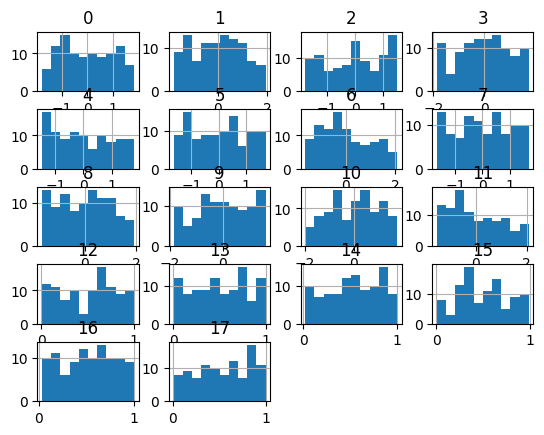

In [24]:

pd.DataFrame(x_train_preprocessor).hist()

array([[<Axes: title={'center': '1'}>]], dtype=object)

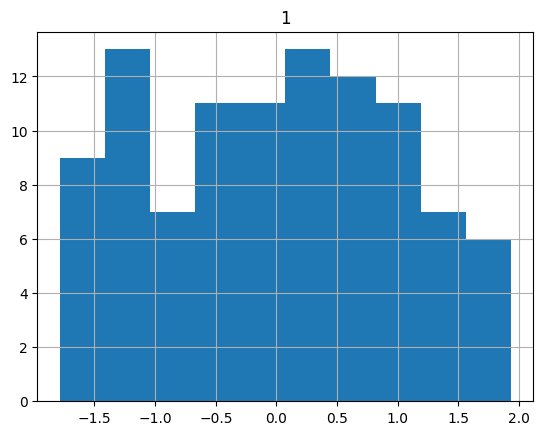

In [25]:
pd.DataFrame(x_train_preprocessor).hist(1) # the first histogram, this can be used for all the 17 Histograms.

In [30]:
# making models 
#sum(y_pred(x) - y)^2/n mean sqquared

from sklearn.metrics import mean_squared_error as mse #import a mean squared error model
from sklearn.linear_model import LinearRegression # import a linear regression

lin_R = LinearRegression().fit(x_train, y_train) # fit in the train model into linearregression model
mse(lin_R.predict(x_train), y_train)        # find the mse of the predicted attributes        



ValueError: Found input variables with inconsistent numbers of samples: [100, 330]

In [31]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Assuming x_train and y_train are correctly defined as per the previous steps

lin_R = LinearRegression().fit(x_train, y_train)
mse_train = mse(lin_R.predict(x_train), y_train)
print("MSE on training data:", mse_train)

# If you have validation data, you can calculate MSE on validation data as well
mse_val = mse(lin_R.predict(x_val), y_val)
print("MSE on validation data:", mse_val)

# If you have test data, you can calculate MSE on test data as well
mse_test = mse(lin_R.predict(x_test), y_test)
print("MSE on test data:", mse_test)


ValueError: Found input variables with inconsistent numbers of samples: [100, 330]

In [32]:
# Splitting the data
x_train, y_train = train_pd.iloc[:, :-1].values, train_pd.iloc[:, -1].values
x_val, y_val = val_pd.iloc[:, :-1].values, val_pd.iloc[:, -1].values
x_test, y_test = test_pd.iloc[:, :-1].values, test_pd.iloc[:, -1].values

# Check the shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (330, 17)
y_train shape: (330,)
x_val shape: (95, 17)
y_val shape: (95,)
x_test shape: (120, 17)
y_test shape: (120,)


In [33]:
import pandas as pd
import numpy as np

# Sample DataFrames (assuming they have the same number of rows)
train_pd = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'target': np.random.randn(100)
})

val_pd = pd.DataFrame({
    'feature1': np.random.randn(30),
    'feature2': np.random.randn(30),
    'target': np.random.randn(30)
})

test_pd = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'target': np.random.randn(50)
})

# Splitting the data
x_train, y_train = train_pd.iloc[:, :-1].values, train_pd.iloc[:, -1].values
x_val, y_val = val_pd.iloc[:, :-1].values, val_pd.iloc[:, -1].values
x_test, y_test = test_pd.iloc[:, :-1].values, test_pd.iloc[:, -1].values

# Check the shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (100, 2)
y_train shape: (100,)
x_val shape: (30, 2)
y_val shape: (30,)
x_test shape: (50, 2)
y_test shape: (50,)


In [41]:
# making models 
#sum(y_pred(x) - y)^2/n mean sqquared

from sklearn.metrics import mean_squared_error as mse #import a mean squared error model
from sklearn.linear_model import LinearRegression # import a linear regression

lin_R = LinearRegression().fit(x_train, y_train) # fit in the train model into linearregression model
mse_xtrain = mse(lin_R.predict(x_train), y_train, squared=False)
mse_yval = mse(lin_R.predict(x_val), y_val, squared=False)         # find the mse of the predicted attributes   

print("Mse for X Train is: ", mse_xtrain)
print("Mse for y val is: ", mse_yval)



Mse for X Train is:  0.9692467891292241
Mse for y val is:  1.0078609510060528


In [56]:
# knn model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=15).fit(x_train, y_train)  # here i used a fit for 15 to make it closer to the validation
knn_xtrain = mse(knn.predict(x_train), y_train, squared=False)
knn_xval = mse(knn.predict(x_val), y_val, squared=False) 

print("KNN xtrain is :", knn_xtrain)
print("KNN validation is: ", knn_xval)


KNN xtrain is : 1.0002776568365779
KNN validation is:  1.0335429094911652


In [60]:
from sklearn.ensemble import RandomForestRegressor

ran_forest = RandomForestRegressor(max_depth=1).fit(x_train, y_train)

ranForest_xtrain = mse(ran_forest.predict(x_train), y_train, squared=False)
ranForest = mse(ran_forest.predict(x_val), y_val, squared=False) 

print("Random forest xtrain is :", ranForest_xtrain)
print("Random forest validation is: ", ranForest)



Random forest xtrain is : 0.9488005579825373
Random forest validation is:  1.0149764271702442


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1).fit(x_train, y_train)

gbr_xtrain = mse(gbr.predict(x_train), y_train, squared=False)
gbr_val = mse(gbr.predict(x_val), y_val, squared=False)

print("The Gradient Boosting Regressor for Xtrain is:", gbr_xtrain)
print("The Gradient Boosting Regressor for Val is:", gbr_val)

The Gradient Boosting Regressor for Xtrain is: 0.9488859419236395
The Gradient Boosting Regressor for Val is: 1.0009334936640344


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Sample data
train_data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [4, 3, 2, 1],
    'target': ['furnished', 'unfurnished', 'furnished', 'unfurnished']
}

# Convert to DataFrame
train_pd = pd.DataFrame(train_data)

# Split features and target
x_train = train_pd[['feature1', 'feature2']].to_numpy()
y_train = train_pd['target']

# One-hot encode the target
y_train_encoded = pd.get_dummies(y_train)['furnished']

# Train the model
lin_R = LinearRegression().fit(x_train, y_train_encoded)
mse_value = mse(lin_R.predict(x_train), y_train_encoded)
print("Mean Squared Error:", mse_value)


Mean Squared Error: 0.2


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for training data
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for testing data
mse_test = mean_squared_error(Y_test, Y_pred)
mae_test = mean_absolute_error(Y_test, Y_pred)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)


In [ ]:
import pandas as pd

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Display the first few rows of the cleaned DataFrame
hdt = House_Data
hdt.head()
#print(House_Data.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Check for missing values
missing_values = House_Data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
House_Data.dropna(inplace=True)

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Convert 'furnishingstatus' to numerical
House_Data['furnishingstatus'] = House_Data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Prepare data for plotting
plot_data = House_Data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']]

# Plot histograms for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(plot_data[col], bins=20, color='skyblu', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()
